# Pymaceuticals Inc.
---

### Analysis

- 1.  Using Capomulin and Ramicane drug regimens appeared to result in the lowest final tumor volume according to the box & whisker plot.
- 2.  There is high correlation (0.84) for mouse weight and average tumor volume for the Capomulin regimen.
- 3.  There is an even distribution of male (51%) versus female (49%) mice in these experiments; therefore, one would assume (without doing a null hypothesis test) that sex of the mice does not affect test results.
 

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_comp = pd.merge(study_results, mouse_metadata, on = ["Mouse ID"])
# Display the data table for preview
data_comp

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
# Checking the number of mice.
mouse_count = data_comp["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = data_comp[data_comp[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicateRows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Findalldups = data_comp.loc[data_comp['Mouse ID'] == 'g989']
Findalldups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = data_comp[data_comp['Mouse ID'].str.contains( 'g989' )==False ]
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_countnew = new_df["Mouse ID"].nunique()
mouse_countnew

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
sumstatsmn = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
sumstatsmn
# Assemble the resulting series into a single summary DataFrame.

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
sumstatsmed = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
sumstatsmed

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [9]:
sumstatsvar = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sumstatsvar

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [10]:
sumstatssd = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sumstatssd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
sumstatssem = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sumstatssem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_tumorv_df = pd.DataFrame({"Mean": sumstatsmn,
                              "Median": sumstatsmed,
                              "Variance": sumstatsvar,
                              "Standard Deviation": sumstatssd,
                              "SEM": sumstatssem})
summary_tumorv_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line.
newagg = summary_tumorv_df.aggregate(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn','Zoniferol'])
newagg

,Mean,Median,Variance,Standard Deviation,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<IPython.core.display.Javascript object>


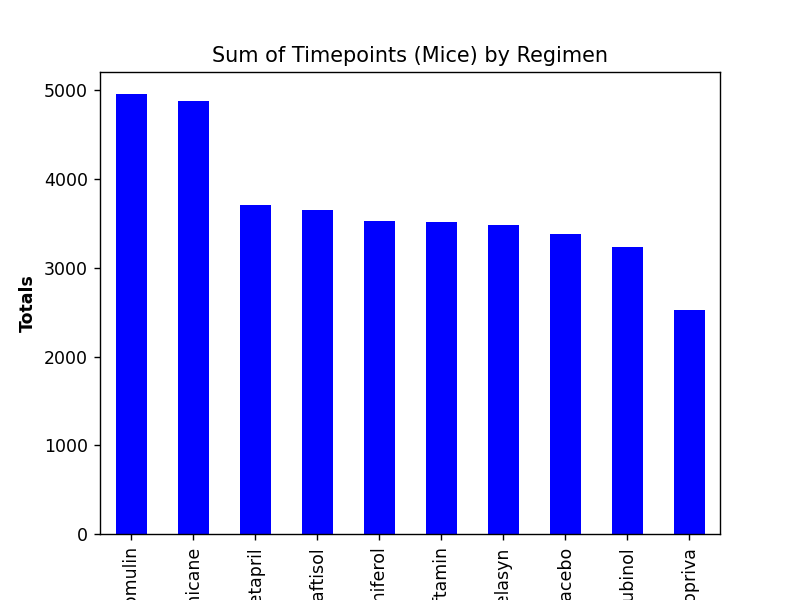

Text(0, 0.5, 'Totals')

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tpstats = new_df.groupby('Drug Regimen')['Timepoint'].sum()
pandas_bar_chart = tpstats.sort_values(ascending = False).plot(kind='bar', color = "b", width=0.5)
pandas_bar_chart.set_title(label='Sum of Timepoints (Mice) by Regimen')
pandas_bar_chart.set_xlabel('Drug Regimen', fontweight = 'bold')
pandas_bar_chart.set_ylabel('Totals', fontweight = 'bold')

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
tp_regimen = new_df.groupby('Drug Regimen')['Timepoint'].sum()
x_axis_regimen = np.arange(len(tp_regimen))
regimen_name = list(tp_regimen.index.values)

<IPython.core.display.Javascript object>


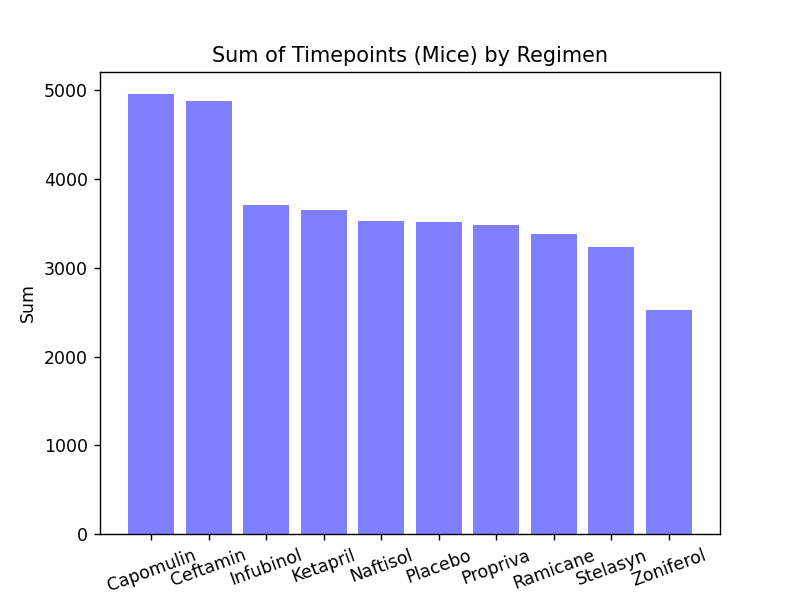

Text(0, 0.5, 'Sum')

In [16]:
py_bar_tp = plt.bar(x_axis_regimen, tp_regimen.sort_values(ascending = False), color = "b", alpha = 0.5)
plt.xticks(x_axis_regimen,regimen_name, rotation=20)
plt.title('Sum of Timepoints (Mice) by Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel("Sum")

<IPython.core.display.Javascript object>


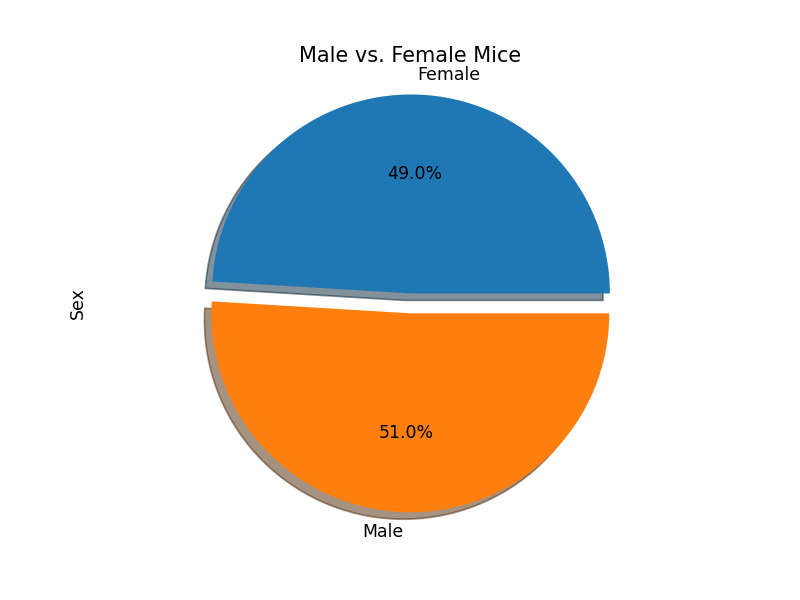

(-1.1097080975813773,
 1.100462290361018,
 -1.2090725214168956,
 1.1129091579915955)

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_s =new_df.groupby("Sex")["Sex"].count()
pmice_s = mice_s.plot(kind="pie", title="Male vs. Female Mice", legend=False, autopct='%1.1f%%', explode=(0,0.1), shadow=True)
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
ft_df = new_df.groupby(["Mouse ID", "Drug Regimen"]).last()["Timepoint"]
ft_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
newest_df = pd.merge(ft_df, new_df, how='inner', on=["Mouse ID", "Timepoint"])
newest_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume_data = []

for treatment in regimen:
    final_tumor_volume = newest_df.loc[newest_df['Drug Regimen'] == treatment,'Tumor Volume (mm3)']
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles=final_tumor_volume.quantile([0.25,0.5,0.75])
    lq=quartiles[0.25]
    uq=quartiles[0.75]
    mean=final_tumor_volume.mean()
    iqr=uq-lq
    lb=lq - (1.5*iqr)
    ub=uq + (1.5*iqr)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    final_tumor_volume_data.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_volume.loc[(final_tumor_volume < lb) | (final_tumor_volume > ub)]
    

<IPython.core.display.Javascript object>


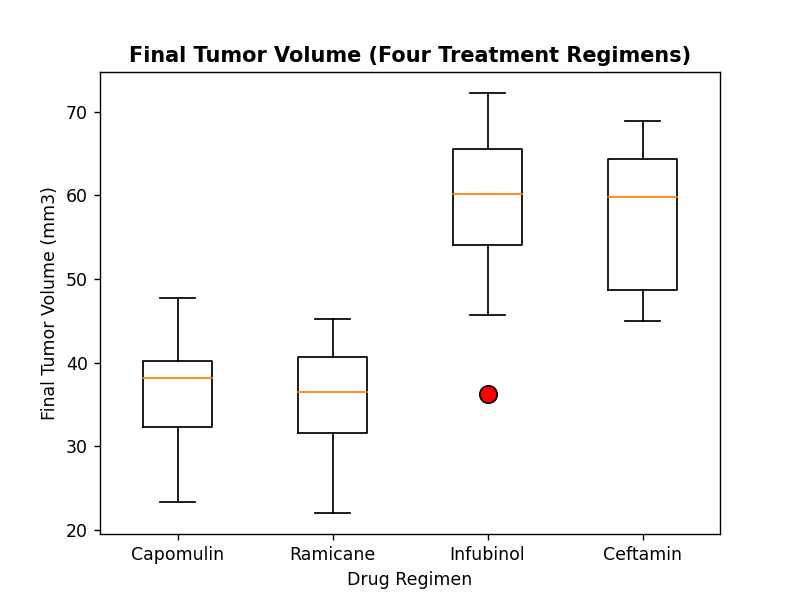

Text(0, 0.5, 'Final Tumor Volume (mm3)')

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_volume_data, labels=regimen, flierprops={'markerfacecolor':'r', 'markersize': 10})
final_tumor_plot.set_title('Final Tumor Volume (Four Treatment Regimens)', fontweight = 'bold')
final_tumor_plot.set_xlabel('Drug Regimen')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

<IPython.core.display.Javascript object>


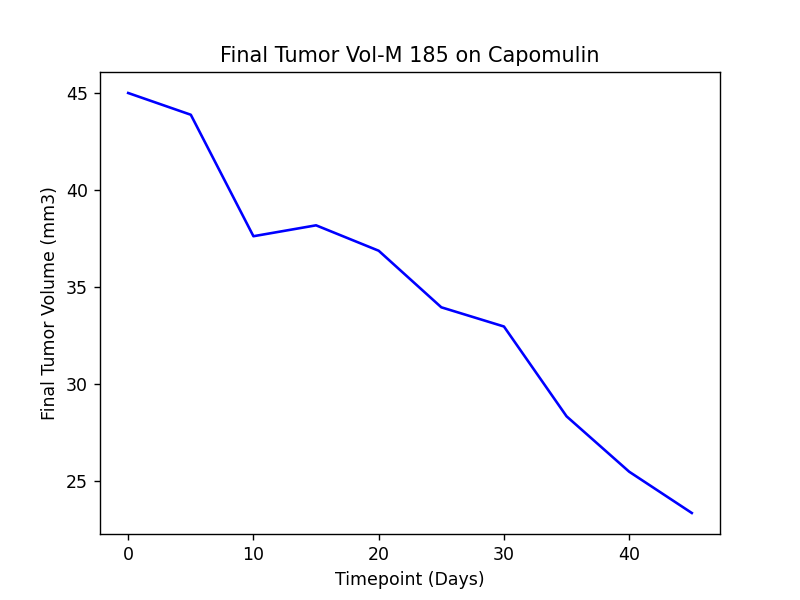

Text(0, 0.5, 'Final Tumor Volume (mm3)')

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = new_df.loc[new_df["Drug Regimen"] == "Capomulin"]
mouse_s185_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185"]
Y_axis = mouse_s185_df["Tumor Volume (mm3)"]
X_axis = mouse_s185_df["Timepoint"]
XYplot = plt.plot(X_axis, Y_axis, color="blue")
plt.title("Final Tumor Vol-M 185 on Capomulin")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Final Tumor Volume (mm3)')


<IPython.core.display.Javascript object>


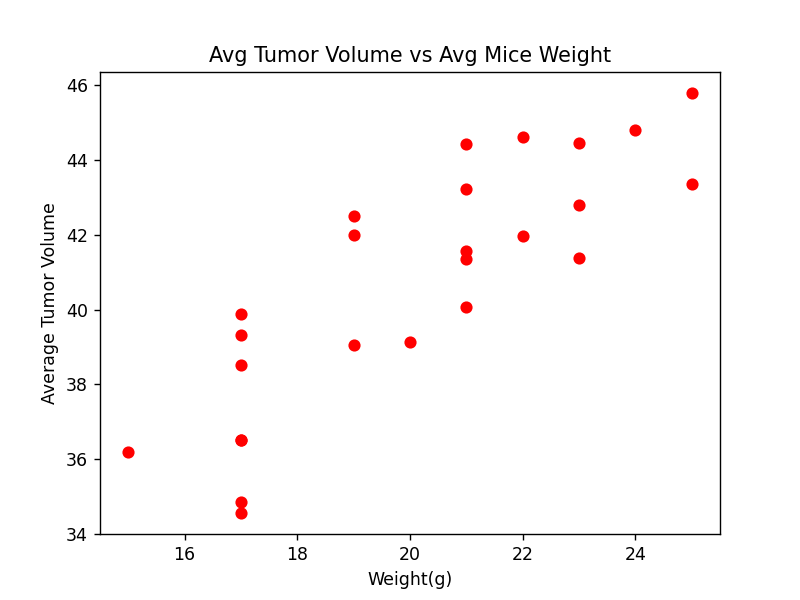

Text(0, 0.5, 'Average Tumor Volume')

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = new_df.loc[new_df["Drug Regimen"] == "Capomulin"]
Capomulin_atv=Capomulin_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
mouseweight_df = Capomulin_df.groupby(["Mouse ID"]).mean()["Weight (g)"]
Y_axis = Capomulin_atv
X_axis= mouseweight_df
XY_plot = plt.scatter(X_axis, Y_axis, color="red")
#labels
plt.title('Avg Tumor Volume vs Avg Mice Weight')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume')


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient
# for mouse weight and average tumor volume for the Capomulin regimen

Y_axis = Capomulin_atv
X_axis = mouseweight_df

correlation = round(st.pearsonr(X_axis, Y_axis)[0],2)
print(f"The correlation is {correlation}")

The correlation is 0.84


In [24]:
# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(X_axis, Y_axis)
regress_values = X_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55
